<div style="display: flex; gap: 10px;">
    <img src="fakenews.jpeg" alt="fake news image" width="350">
    <img src="fakenews.jpeg" alt="fake news image" width="350">
    <img src="fakenews.jpeg" alt="fake news image" width="350">
</div>

<h1 style="color:#00008B; font-family: 'Times New Roman', Times, serif; font-size: 40px; text-align: center;"><b>Fake News Prediction</b></h1>

# Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Loading Dataset

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# printing the stopwords in English
# Stop words are common words that search engines ignore in search text.
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
news_data = pd.read_csv('train.csv')
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


**About the Dataset:**

1. **id**: unique id for a news article
2. **title**: the title of a news article
3. **author**: author of the news article
4. **text**: the text of the article; could be incomplete
5. **label**: a label that marks whether the news article is real or fake
   
           1 --> Fake news
           0 --> Real News

In [10]:
news_data.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [11]:
news_data.shape

(20800, 5)

In [12]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [13]:
news_data['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

_**# Balanced Dataset**_

# Data Pre-processing

### Missing Data Analysis

In [17]:
# Check for missing values
missing_values = news_data.isnull().sum()

# Calculate the percentage of missing data in each column 
# (for better understanding on how data is missing)
missing_percentage = (missing_values / len(news_data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 id           0
title      558
author    1957
text        39
label        0
dtype: int64

Percentage of Missing Data:
 id        0.000000
title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64


<Axes: >

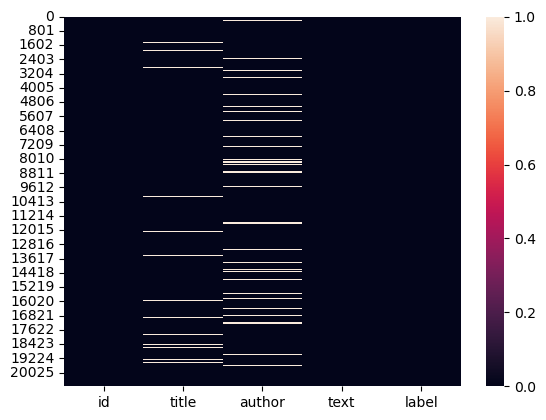

In [18]:
# Missing values heatmap
sns.heatmap(news_data.isnull())

In [19]:
# replacing the null values with empty string
news_data_cleaned = news_data.fillna("")

In [20]:
# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(news_data_cleaned.isnull().sum())


Missing values in each column after removal:
id        0
title     0
author    0
text      0
label     0
dtype: int64


<Axes: >

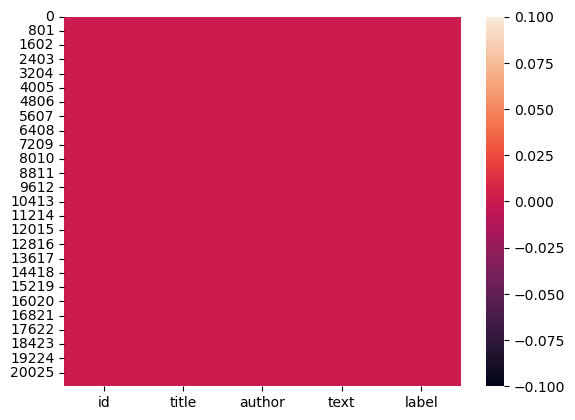

In [21]:
# Missing values heatmap
sns.heatmap(news_data_cleaned.isnull())

**Now, our data is free from missing values!!!**

### Creating 'content' column

In [24]:
news_data2 = news_data_cleaned.copy()

In [25]:
# Create a content column by merging the author name and news title 
news_data2['content'] = news_data2['author'] +' '+ news_data2['title']

In [26]:
news_data2['content'].head()

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: content, dtype: object

### Stemming:

Stemming is the process of reducing a word to its **root** word.

example:
actor, actress, acting --> act

In [29]:
news_data2.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [30]:
port_stem = PorterStemmer()

In [31]:
def stemming(content):
    # replace any non-alphabetic characters in the content variable with a space character
    stemmed_content= re.sub('[^a-zA-Z]',' ', content)
    
    # Convert all words into lower case letters
    stemmed_content = stemmed_content.lower() 
    
    # Split the words into list
    stemmed_content = stemmed_content.split()
    
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    
    return stemmed_content

In [32]:
news_data2['content'] = news_data2['content'].apply(stemming)

In [33]:
news_data2['content'].head()

0    darrel lucu hous dem aid even see comey letter...
1    daniel j flynn flynn hillari clinton big woman...
2               consortiumnew com truth might get fire
3    jessica purkiss civilian kill singl us airstri...
4    howard portnoy iranian woman jail fiction unpu...
Name: content, dtype: object

In [34]:
# separating the data and label
# Using the text column data will take too much computations so the content 
# column (author + title) will be a good substitute
X = news_data2['content'].values
y = news_data2['label'].values

In [35]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [36]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

### Applying Vectorizer

In [38]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X_vect = vectorizer.transform(X)

In [39]:
print(X_vect)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size = 0.2, stratify=y, random_state=7)

# Training Model

### Imports

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay, classification_report

In [119]:
def train_and_evaluate(model , model_name):
    model.fit(X_train, y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test, y_test)}")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Accent')
    print(classification_report(y_test, model.predict(X_test)))
    return model

### Using Logistic Regression

Training accuracy of Logistic Regression is 0.9870192307692308
testing accuracy of Logistic Regression is 0.978125
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.96      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



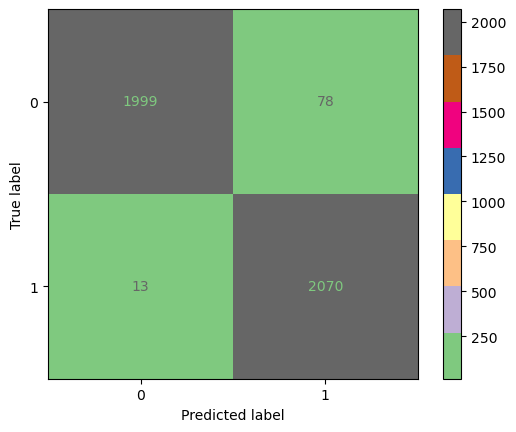

In [121]:
lr_model = LogisticRegression()
lr_model = train_and_evaluate(lr_model, 'Logistic Regression')

In [164]:
y_pred = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)

print(accuracy_lr, f1_lr, recall_lr, precision_lr)

0.978125 0.9784920822500591 0.9937590014402304 0.9636871508379888


### Using SVM

Training accuracy of SVM is 0.998858173076923
testing accuracy of SVM is 0.9882211538461538
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2077
           1       0.98      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



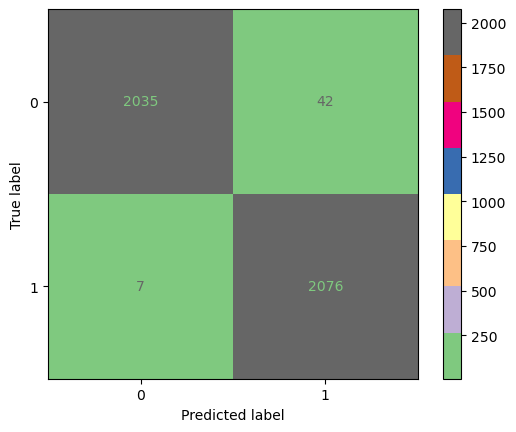

In [133]:
svc_model = SVC()
svc_model = train_and_evaluate(svc_model, 'SVM')

In [162]:
y_pred = svc_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred)
f1_svc = f1_score(y_test, y_pred)
recall_svc = recall_score(y_test, y_pred)
precision_svc = precision_score(y_test, y_pred)

print(accuracy_svc, f1_svc, recall_svc, precision_svc)

0.9882211538461538 0.9883361104498929 0.9966394623139703 0.9801699716713881


### Using Decision Tree Classifier

Training accuracy of Decison Tree is 0.9982572115384616
testing accuracy of Decison Tree is 0.9935096153846154
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2077
           1       0.99      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



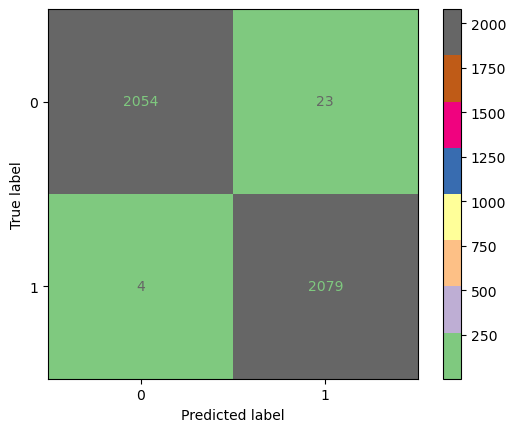

In [141]:
dtc_model = DecisionTreeClassifier(max_depth=58,random_state=42)
dtc_model = train_and_evaluate(dtc_model, "Decison Tree")

In [160]:
y_pred = dtc_model.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred)
f1_dtc = f1_score(y_test, y_pred)
recall_dtc = recall_score(y_test, y_pred)
precision_dtc = precision_score(y_test, y_pred)

print(accuracy_dtc, f1_dtc, recall_dtc, precision_dtc)

0.9935096153846154 0.9935483870967742 0.9980796927508402 0.989058039961941


### Comparing

In [194]:
# Compile all performance metrics into a dictionary for easy visualization
performance_metrics = {
    "Model": ["Logistic Regression", "SVM", "Decision Tree"],
    "Accuracy": [accuracy_lr, accuracy_svc, accuracy_dtc],
    "F1 Score": [f1_lr, f1_svc, f1_dtc],
    "Recall": [recall_lr, recall_svc, recall_dtc],
    "Precision": [precision_lr, precision_svc, precision_dtc]
}

# Convert to DataFrame for easier plotting
df_metrics = pd.DataFrame(performance_metrics)

df_metrics = df_metrics.round(3)
print(df_metrics)

                 Model  Accuracy  F1 Score  Recall  Precision
0  Logistic Regression     0.978     0.978   0.994      0.964
1                  SVM     0.988     0.988   0.997      0.980
2        Decision Tree     0.994     0.994   0.998      0.989


<h4>The <b>Decision Trees Model</b> has the best accuracy, <b>99.4%</b></h4>

# Test Prediction

In [53]:
best_model = dtc_model

In [54]:
best_model.predict(X_vect[:10])

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [55]:
y[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [56]:
news_data.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [57]:
def predict_label(title, author, text):
    content = author +" "+title
    content = stemming(content)
    X_vect = vectorizer.transform([content])
    return best_model.predict(X_vect)

In [58]:
title1 = "FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart"
author1 = "Daniel J. Flynn"
text1 = ""  # NOT NEEDED

In [59]:
predict_label(title1, author1, text1)

array([0], dtype=int64)

In [60]:
title2 = "House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It"
author2 = "Darrell Lucus"
text2 = "" # NOT USEFUL

In [61]:
predict_label(title2, author2, text2)

array([1], dtype=int64)

In [62]:
title3 = "Ronaldo to hit 1000 goals nest year - Wenger"
author3 = "Lancelot H. Gabriel"
text3 = ""  # NOT NEEDED

In [63]:
predict_label(title3, author3, text3)

array([1], dtype=int64)

# Exporting Model

In [65]:
# Export model
import pickle
with open('fake_news_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

In [66]:
# Export vectorizer
with open('fake_news_vectorizer.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)